In [1]:
# @author Jungjae Lee
# Independent Study
# Created on June 26, 2022
# Sources: Algorithmic Trading Strategy Using Python by Computer Science on the Youtube channel

In [2]:
# This program uses the dual moving average crossover to determine when to buy and sell stock

In [3]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
AAPL = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-06-24')
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898560
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2022-06-17,133.080002,129.809998,130.070007,131.559998,134118500.0,131.559998
2022-06-21,137.059998,133.320007,133.419998,135.869995,81000500.0,135.869995
2022-06-22,137.759995,133.910004,134.789993,135.350006,73409200.0,135.350006


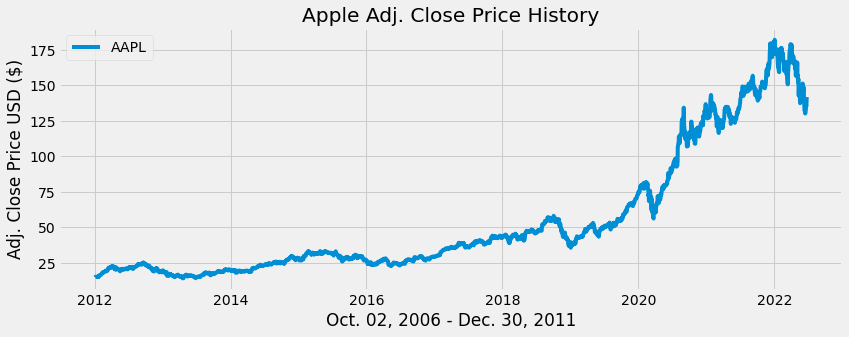

In [5]:
# Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2022-06-17,143.546001
2022-06-21,142.832334
2022-06-22,142.275334


In [7]:
# Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,NaN
...,...
2022-06-17,159.573309
2022-06-21,159.339480
2022-06-22,159.105139


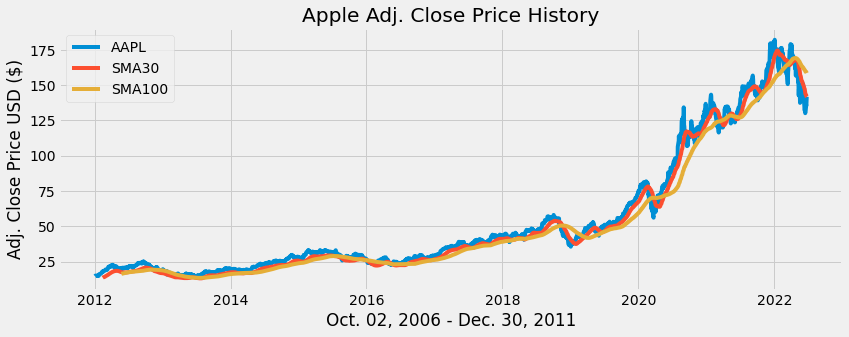

In [8]:
# Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Close'], label='AAPL')
plt.plot(SMA30['Adj Close'], label='SMA30')
plt.plot(SMA100['Adj Close'], label='SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()